In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load EEG data (replace 'your_eeg_data.csv' with the actual file path)
eeg_data = pd.read_csv('EEg.csv')

# Display the first few rows of the dataset
eeg_data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [4]:
# Identify and handle categorical columns
categorical_columns = ['sex', 'main.disorder','specific.disorder','IQ','education'] 

# Display unique values in categorical columns
for column in categorical_columns:
    print(f"Unique values in {column}: {eeg_data[column].unique()}")


Unique values in sex: ['M' 'F']
Unique values in main.disorder: ['Addictive disorder' 'Trauma and stress related disorder' 'Mood disorder'
 'Healthy control' 'Obsessive compulsive disorder' 'Schizophrenia'
 'Anxiety disorder']
Unique values in specific.disorder: ['Alcohol use disorder' 'Acute stress disorder' 'Depressive disorder'
 'Healthy control' 'Behavioral addiction disorder'
 'Obsessive compulsitve disorder' 'Schizophrenia' 'Panic disorder'
 'Social anxiety disorder' 'Posttraumatic stress disorder'
 'Adjustment disorder' 'Bipolar disorder']
Unique values in IQ: [ nan 120. 113. 126. 112. 105. 103. 104.  89.  98.  91.  93. 118. 116.
 107.  86. 102. 128. 122. 130. 108. 117.  94.  81. 110. 114. 123.  76.
 129. 134.  82. 109.  97. 101.  99.  96.  84.  90. 124.  83. 127. 106.
 121.  85. 119.  88.  78.  73. 142. 135. 115. 133. 131. 139. 125.  79.
  74.  65. 111.  59.  80. 100.  56.  77.  95. 138.  71.  87. 136.  75.
 137.  92. 145.  62.  70.  60.  61.  72.  55.  66.  67.  64.  53.  63.


In [5]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
eeg_data_encoded = pd.concat([eeg_data.drop(categorical_columns, axis=1),
                              pd.DataFrame(encoder.fit_transform(eeg_data[categorical_columns]))],
                             axis=1)

# Display the first few rows of the encoded dataset
eeg_data_encoded.head()

D:\New folder\pyt\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,no.,age,eeg.date,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,114,115,116,117,118,119,120,121,122,123
0,1,57.0,2012.8.30,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,37.0,2012.9.6,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,32.0,2012.9.10,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,35.0,2012.10.8,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,36.0,2012.10.18,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import numpy as np

# Convert the DataFrame to a NumPy array, handling non-numeric values
eeg_data_array = eeg_data_encoded.apply(pd.to_numeric, errors='coerce').to_numpy()

# Fill NaN values with a suitable strategy (e.g., mean or median)
eeg_data_array = np.nan_to_num(eeg_data_array)

D:\New folder\pyt\New folder\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


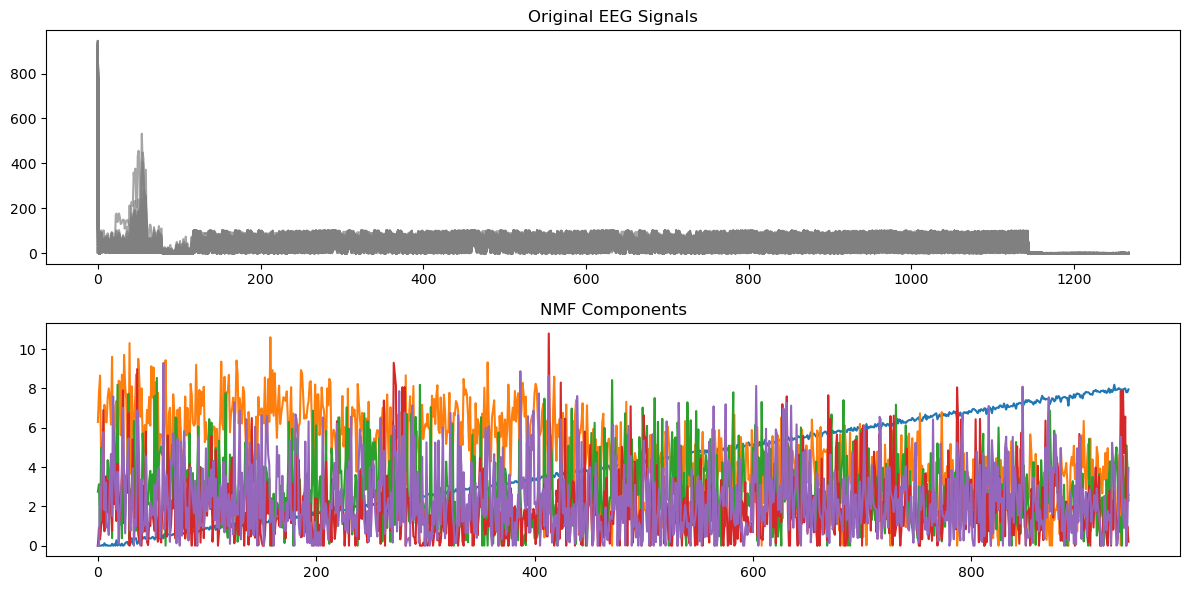

In [8]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Choose the number of components for NMF
n_components = 5

# Apply NMF to decompose EEG data
model = NMF(n_components=n_components, init='random', random_state=42)
W = model.fit_transform(eeg_data_array)
H = model.components_

# Plot the original EEG signals and NMF components
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(eeg_data_array.T, color='gray', alpha=0.7)
plt.title('Original EEG Signals')

plt.subplot(2, 1, 2)
plt.plot(W)
plt.title('NMF Components')

plt.tight_layout()
plt.show()

D:\New folder\pyt\New folder\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


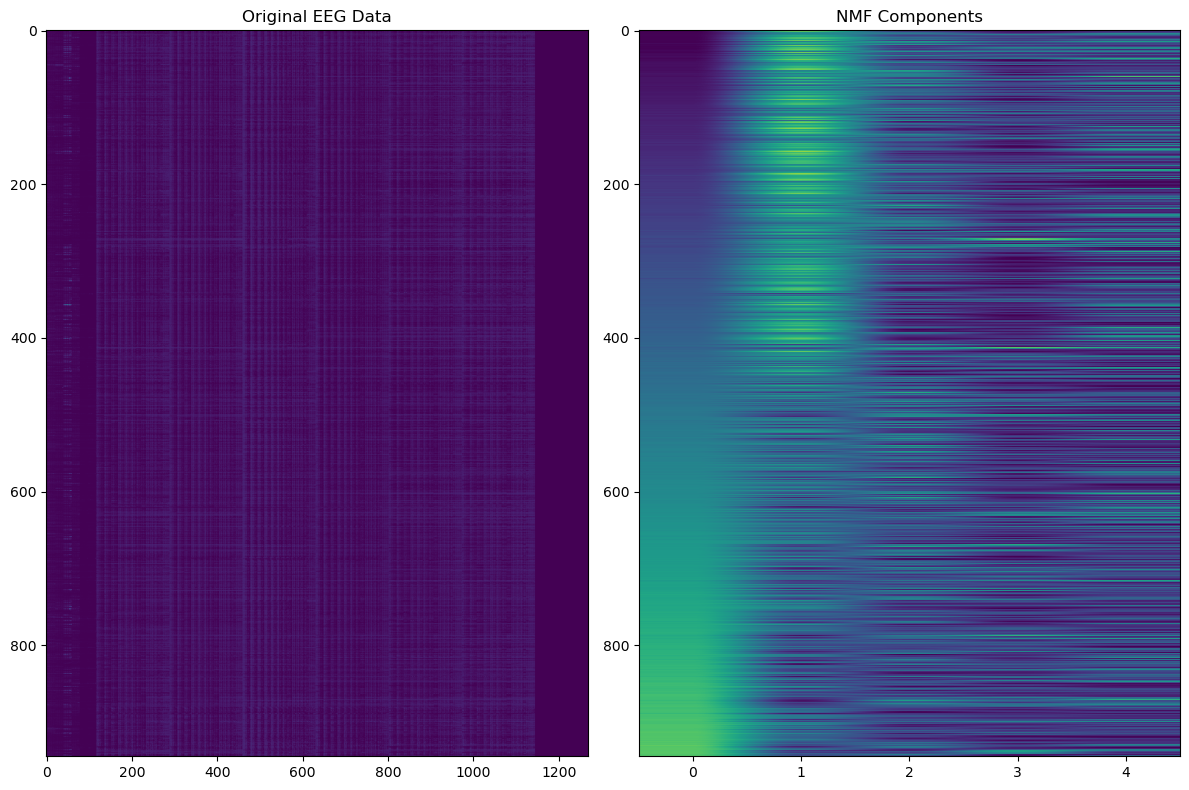

In [9]:
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Choose the number of components for NMF
n_components = 5

# Apply NMF to decompose EEG data
model = NMF(n_components=n_components, init='random', random_state=42)
W = model.fit_transform(eeg_data_array)
H = model.components_

# Plot the original EEG signals and NMF components in matrix form
plt.figure(figsize=(12, 8))

# Plot original EEG signals as a matrix
plt.subplot(1, 2, 1)
plt.imshow(eeg_data_array, cmap='viridis', aspect='auto')
plt.title('Original EEG Data')

# Plot NMF components as a matrix
plt.subplot(1, 2, 2)
plt.imshow(W, cmap='viridis', aspect='auto')
plt.title('NMF Components')

plt.tight_layout()
plt.show()

In [10]:
# Display the original EEG data matrix
print("Original EEG Data Matrix:")
print(eeg_data_array)

# Display the NMF components matrix
print("\nNMF Components Matrix:")
print(W)

Original EEG Data Matrix:
[[  1.  57.   0. ...   0.   0.   1.]
 [  2.  37.   0. ...   0.   0.   0.]
 [  3.  32.   0. ...   0.   0.   0.]
 ...
 [943.  26.   0. ...   0.   0.   0.]
 [944.  24.   0. ...   0.   0.   0.]
 [945.  21.   0. ...   0.   0.   0.]]

NMF Components Matrix:
[[0.         6.29397822 2.74735452 0.         0.        ]
 [0.         7.78144051 3.12178946 0.91944856 0.        ]
 [0.         8.65731533 0.52133115 0.31862016 3.02526026]
 ...
 [7.80834331 2.18442339 5.11882381 0.         0.        ]
 [7.81495791 2.74198379 4.05556363 0.99030908 1.18931967]
 [7.95454579 2.57219149 2.29249035 0.20251178 3.95401747]]


In [11]:
# Remove artifacts by reconstructing the EEG data without selected components
components_to_remove = [1, 3]  # Adjust based on analysis of NMF components
eeg_data_cleaned = np.dot(W[:, [i for i in range(n_components) if i not in components_to_remove]], H[[i for i in range(n_components) if i not in components_to_remove], :])


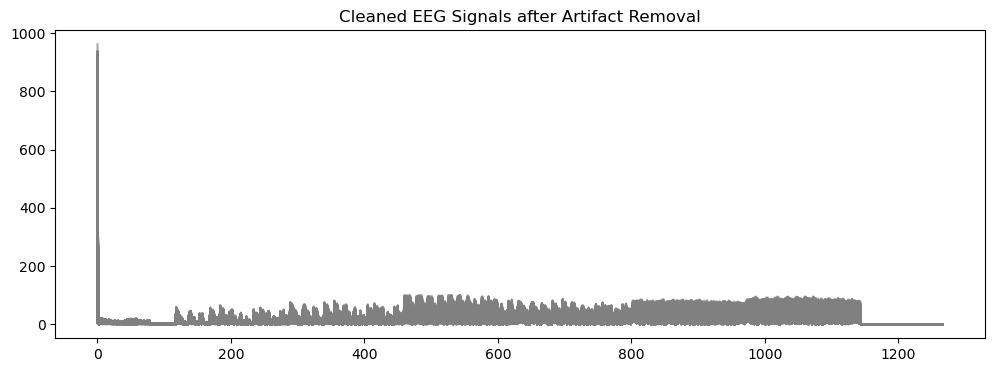

In [12]:
# Display the cleaned EEG signals after artifact removal
plt.figure(figsize=(12, 4))
plt.plot(eeg_data_cleaned.T, color='gray', alpha=0.7)
plt.title('Cleaned EEG Signals after Artifact Removal')
plt.show()

In [20]:
# Select components to emphasize for signal enhancement
components_to_emphasize = [1,3,4]  # Adjust based on analysis of NMF components

# Reconstruct EEG data by emphasizing selected components
eeg_data_enhanced = np.dot(W[:, components_to_emphasize], H[components_to_emphasize, :])

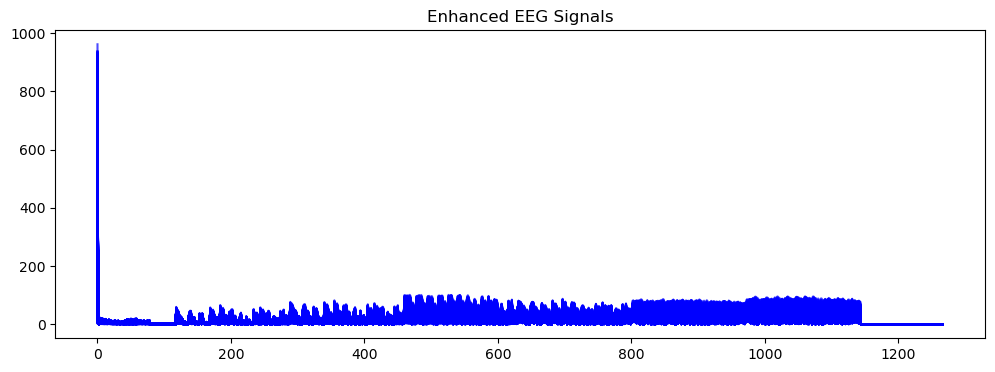

In [14]:
# Display the enhanced EEG signals
plt.figure(figsize=(12, 4))
plt.plot(eeg_data_enhanced.T, color='blue', alpha=0.7)  # Plot in a different color for emphasis
plt.title('Enhanced EEG Signals')
plt.show()